### TASK 1
Load the classical wines dataset.

So first we load the wines dataset from sklearn library and print a few rows to check how it looks.

In [17]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset
wine_data = load_wine()

# Convert it into a DataFrame for easier manipulation
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Display the first few rows
print(wine_df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

### TASK 2
Cluster the inputs with a clustering method of your choice

We are going to cluster the data using K-Means clustering algorithm.

We will choose 3 cluster centers because there are only 3 types of wine in the target data.

In [22]:
from sklearn.cluster import KMeans

# Using K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=33)
wine_clusters = kmeans.fit_predict(wine_df)

#### Standartization
We will use standartization to lower the distances between values in each dimension. And then we will compare the results

In [24]:
from sklearn.preprocessing import StandardScaler

# Standardize and transform the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

# Using K-Means clustering
kmeans_scaled = KMeans(n_clusters=3, random_state=33)
wine_clusters_scaled = kmeans_scaled.fit_predict(wine_scaled)

### TASK 3
Visualize the clustering results

We display both clusters with standardization and without it.

c:\dev\aml\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


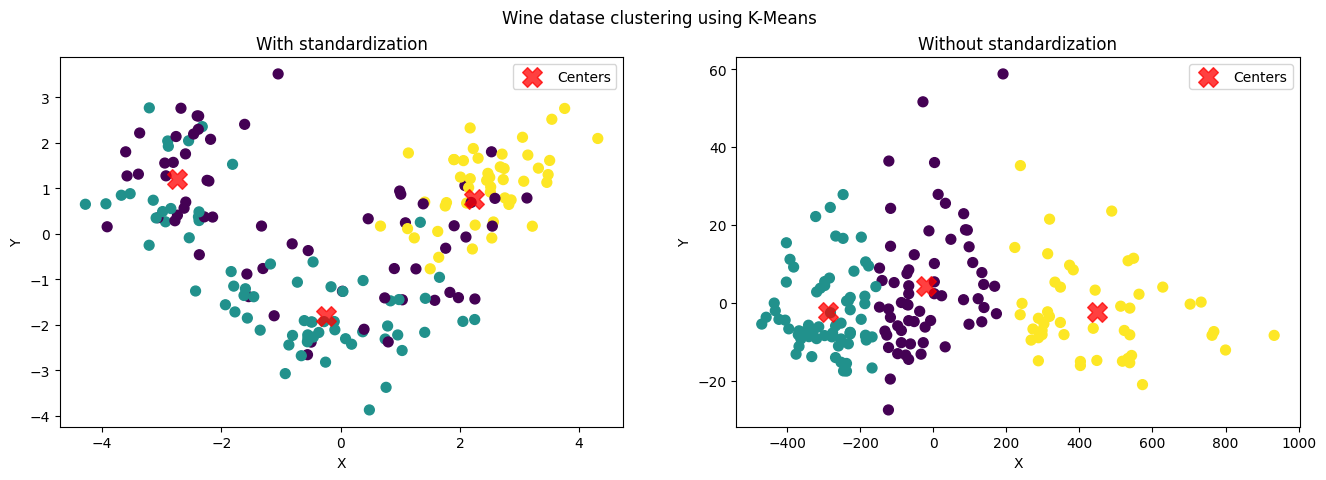

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Using PCA to reduce the dimensionality.
pca_scaled = PCA(n_components=2)
pca = PCA(n_components=2)
wine_pca_scaled = pca_scaled.fit_transform(wine_scaled)
wine_pca = pca.fit_transform(wine_df)

# Create a scatter plot
fig2, (ax2, ax3) = plt.subplots(nrows=1, ncols=2) # two axes on figure
fig2.set_figwidth(16)


# Scatter values on the plot
ax2.scatter(wine_pca_scaled[:, 0], wine_pca_scaled[:, 1], c=wine_clusters, cmap='viridis', s=50)
ax3.scatter(wine_pca[:, 0], wine_pca[:, 1], c=wine_clusters, cmap='viridis', s=50)

# Mark cluster centers
centers_scaled = pca_scaled.transform(kmeans_scaled.cluster_centers_)
centers = pca.transform(kmeans.cluster_centers_)

ax2.scatter(centers_scaled[:, 0], centers_scaled[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')
ax3.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')

# Adding some labels
fig2.suptitle('Wine datase clustering using K-Means')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title("With standardization")
ax2.legend()
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title("Without standardization")
ax3.legend()
plt.show()

### TASK 4
Check how well your clustering corresponds to the real classes of wines.

To measure the results we will use confusion matrix which will show us how well predicted clusters map to true labels. There should be a clear diagonal pattern if the clustering is effective.

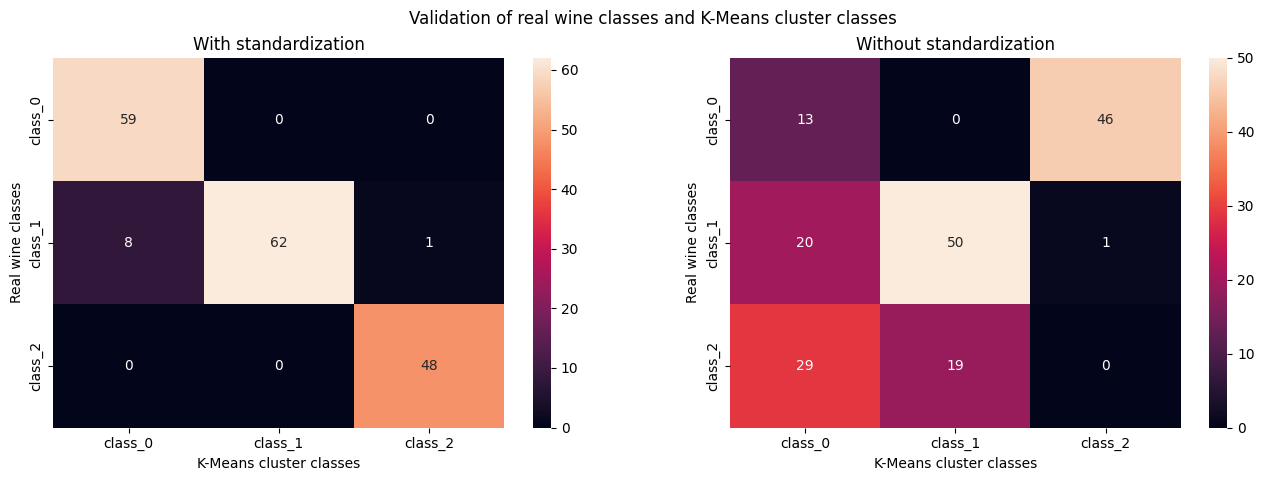

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
conf_matrix_scaled = confusion_matrix(wine_data.target, wine_clusters_scaled)
conf_matrix = confusion_matrix(wine_data.target, wine_clusters)

# Create a scatter plot
fig2, (ax2, ax3) = plt.subplots(nrows=1, ncols=2) # two axes on figure
fig2.set_figwidth(16)

# Visualize confusion matrix
sns.heatmap(conf_matrix_scaled, ax=ax2, annot=True, fmt='d',
            xticklabels=wine_data.target_names,
            yticklabels=wine_data.target_names)

sns.heatmap(conf_matrix, ax=ax3, annot=True, fmt='d',
            xticklabels=wine_data.target_names,
            yticklabels=wine_data.target_names)
fig2.suptitle('Validation of real wine classes and K-Means cluster classes')
ax2.set_xlabel('K-Means cluster classes')
ax2.set_ylabel('Real wine classes')
ax2.set_title("With standardization")
ax3.set_xlabel('K-Means cluster classes')
ax3.set_ylabel('Real wine classes')
ax3.set_title("Without standardization")
plt.show()

As we can see using standardization improves our results when clustering using k-means algorithm.